# Vision Tarea 16: Transformada Discreta de Fourier
#### Daniel Castro Pineda 2220220H

### Para cada una de las propiedades de la TDF en una dimensión, implementar una serie con 128 muestras y probar que numéricamente se cumple cada una de las propiedades que te fueron asignadas

In [249]:
import numpy as np
from scipy.ndimage import shift
from scipy.ndimage import convolve1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

In [250]:
N = 128

## Desplazamiento en frecuencia

/var/folders/hs/q_d_445d1x1173_zp50_lv3w0000gn/T/ipykernel_45102/348328401.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


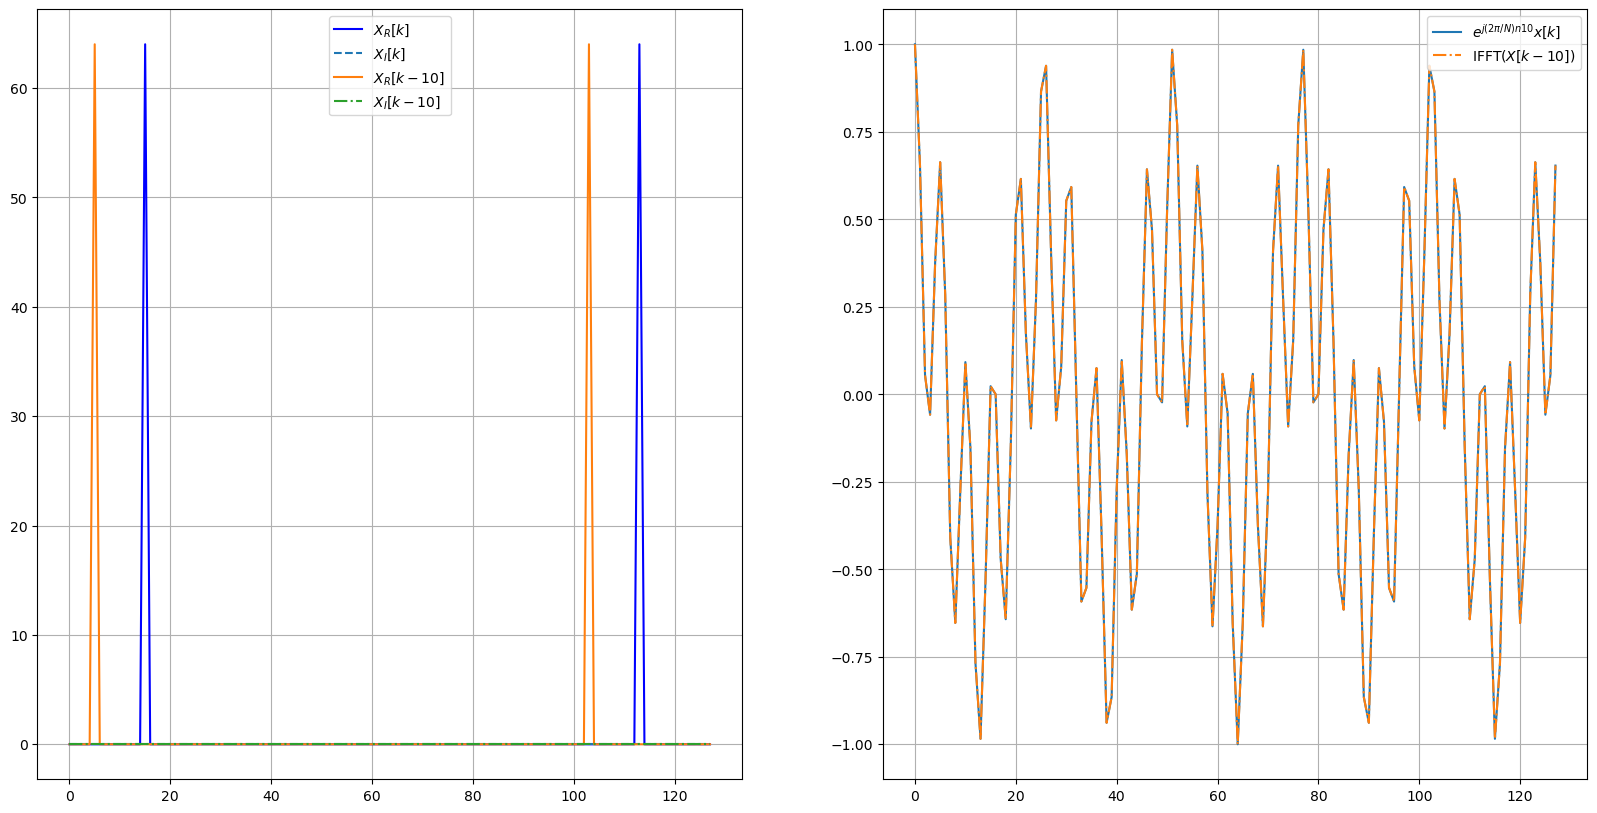

In [251]:
x = np.array([np.cos((30*np.pi*n)/N) for n in range(N)])
x2 = np.array([np.exp(1j*(2*np.pi*n)*10/N)*np.cos((30*np.pi*n)/N)
              for n in range(N)])
X = fft(x)
Xdesplazada = shift(X, -10,mode='grid-wrap')
plt.figure(figsize=(20, 10))
plt.title('Desplazamiento en el dominio de la frecuencia')

plt.subplot(1, 2, 1)
plt.plot(X.real, 'b-', label='$X_R[k]$' )
plt.plot(X.imag, '--' ,label='$X_I[k]$' )
plt.plot(Xdesplazada.real, label='$X_R[k-10]$')
plt.plot(Xdesplazada.imag, '-.' ,label='$X_I[k-10]$')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x2 , label='$e^{j(2\pi/N)n10}x[k]$')
plt.plot(ifft(Xdesplazada), '-.' ,label='IFFT($X[k-10]$)')
plt.legend()
plt.grid()

plt.show()

## Convolución

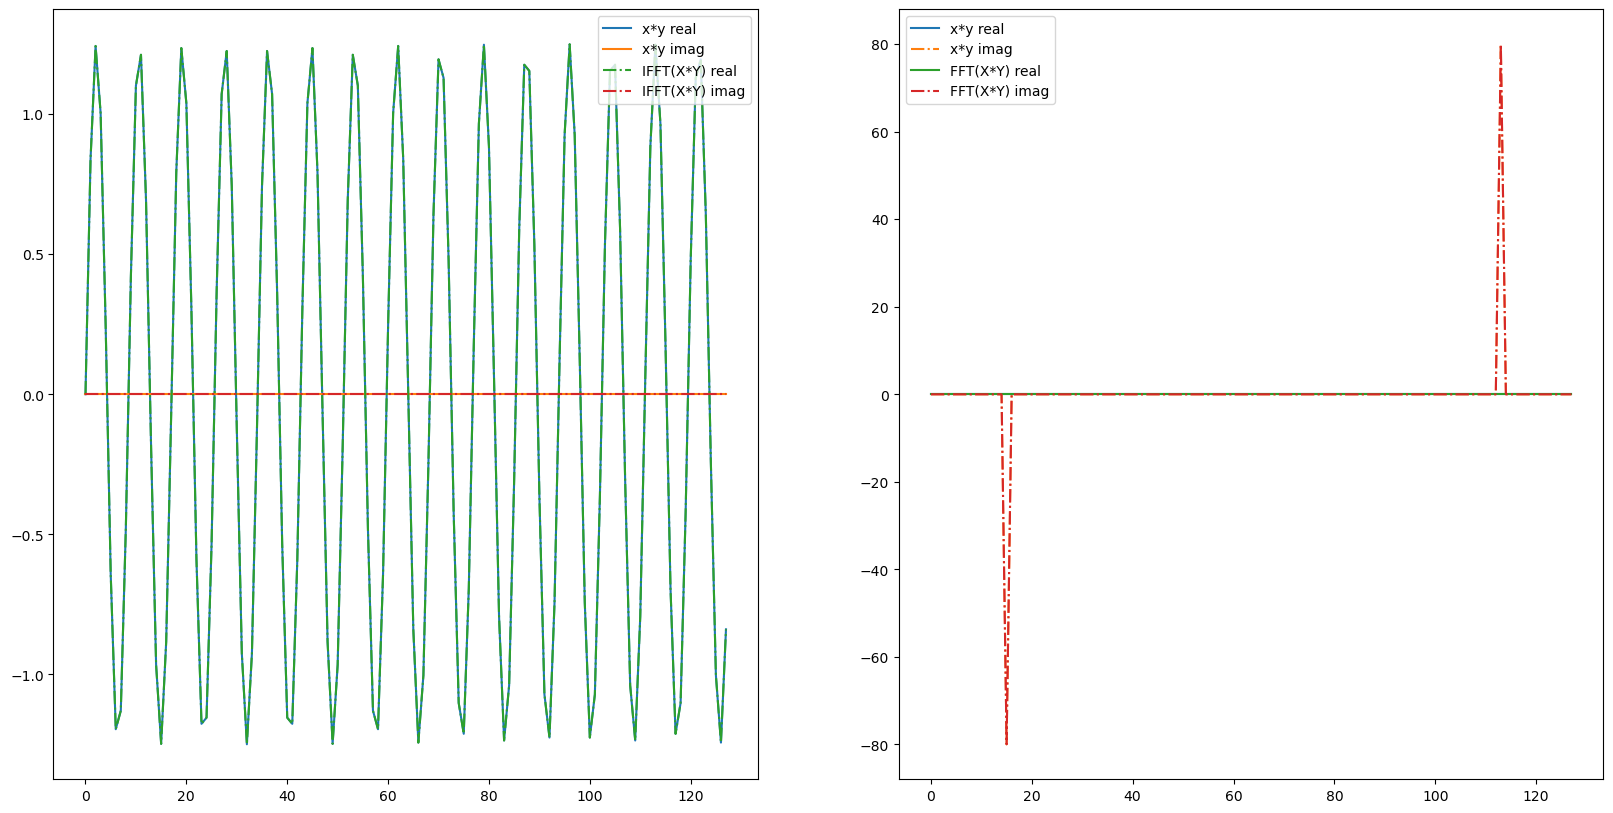

In [306]:
x = np.array([np.sin((30*np.pi*n)/N) for n in range(N)])
y =  np.array([1 if n <= 30 else 1 if n >= N-30 else 0 for n in range(N)])

xcony = convolve1d(x, y, mode='wrap')
X = fft(x)
Y = fft(y)
XconY = -X*Y
ftxcony = fft(xcony)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(xcony.real, label='x*y real')
plt.plot(xcony.imag, label='x*y imag')
plt.plot(ifft(XconY).real, '-.', label='IFFT(X*Y) real')
plt.plot(ifft(XconY).imag, '-.', label='IFFT(X*Y) imag')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(ftxcony.real, label='x*y real')
plt.plot(ftxcony.imag, '-.', label='x*y imag')
plt.plot(XconY.real, label='FFT(X*Y) real')
plt.plot(XconY.imag, '-.',label='FFT(X*Y) imag')
plt.legend()



## Simetría

### Simetría x[n] real 

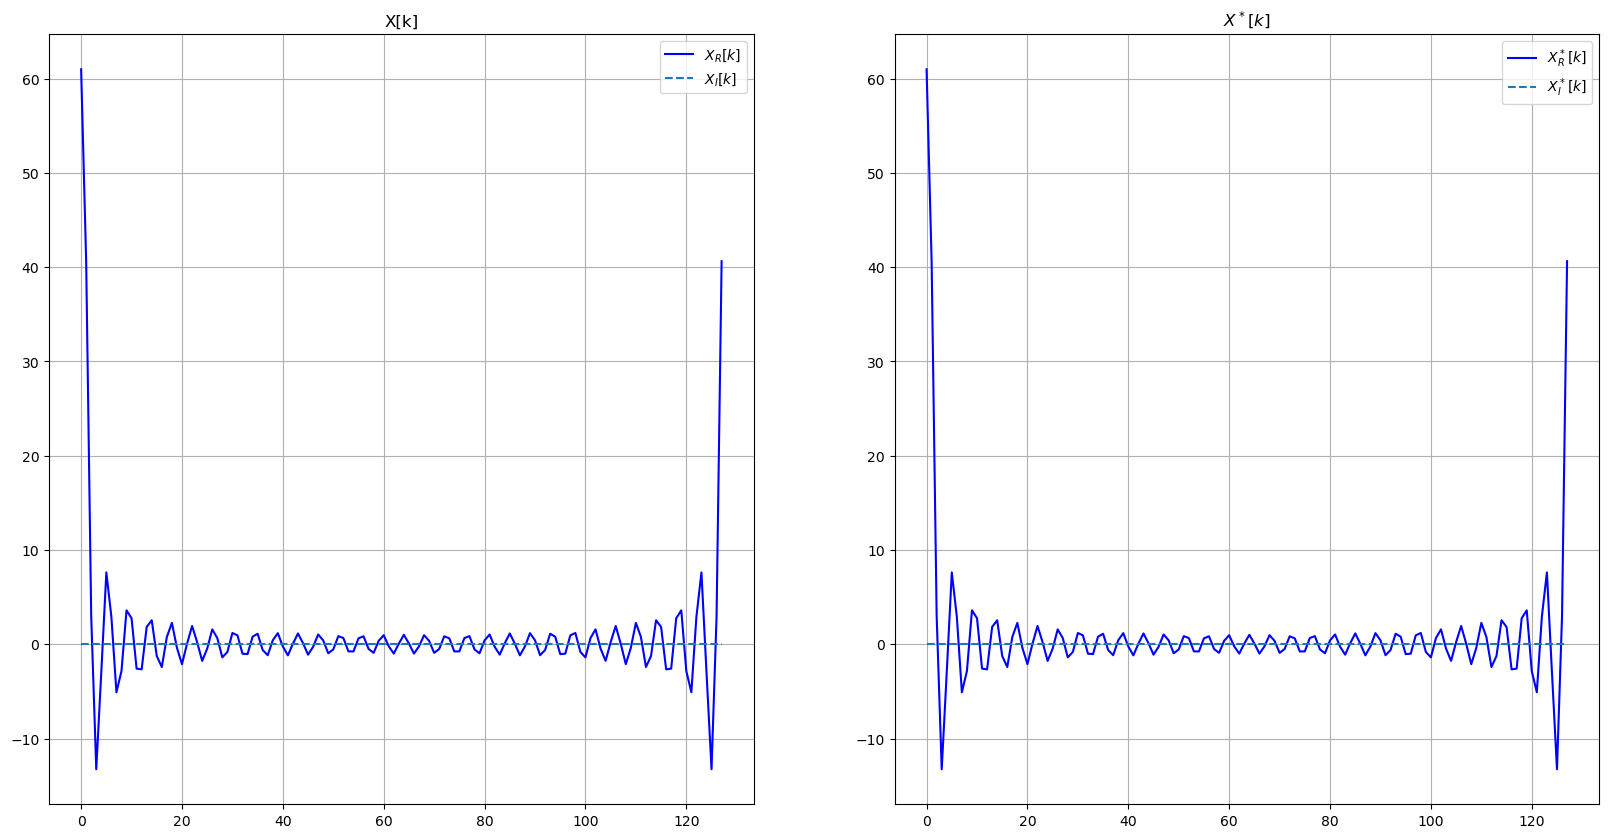

In [254]:
x = np.array([1 if n <= 30 else 1 if n >= N-30 else 0 for n in range(N)])
X = fft(x)
Xconj = np.conj(X)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('X[k]')
plt.plot(X.real, 'b-', label='$X_R[k]$' )
plt.plot(X.imag, '--' ,label='$X_I[k]$' )
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title('$X^*[k]$')
plt.plot(Xconj.real, 'b-', label='$X^*_R[k]$' )
plt.plot(Xconj.imag, '--' ,label='$X^*_I[k]$' )
plt.legend()
plt.grid()
plt.show()



### Simetría x[n] real y par 

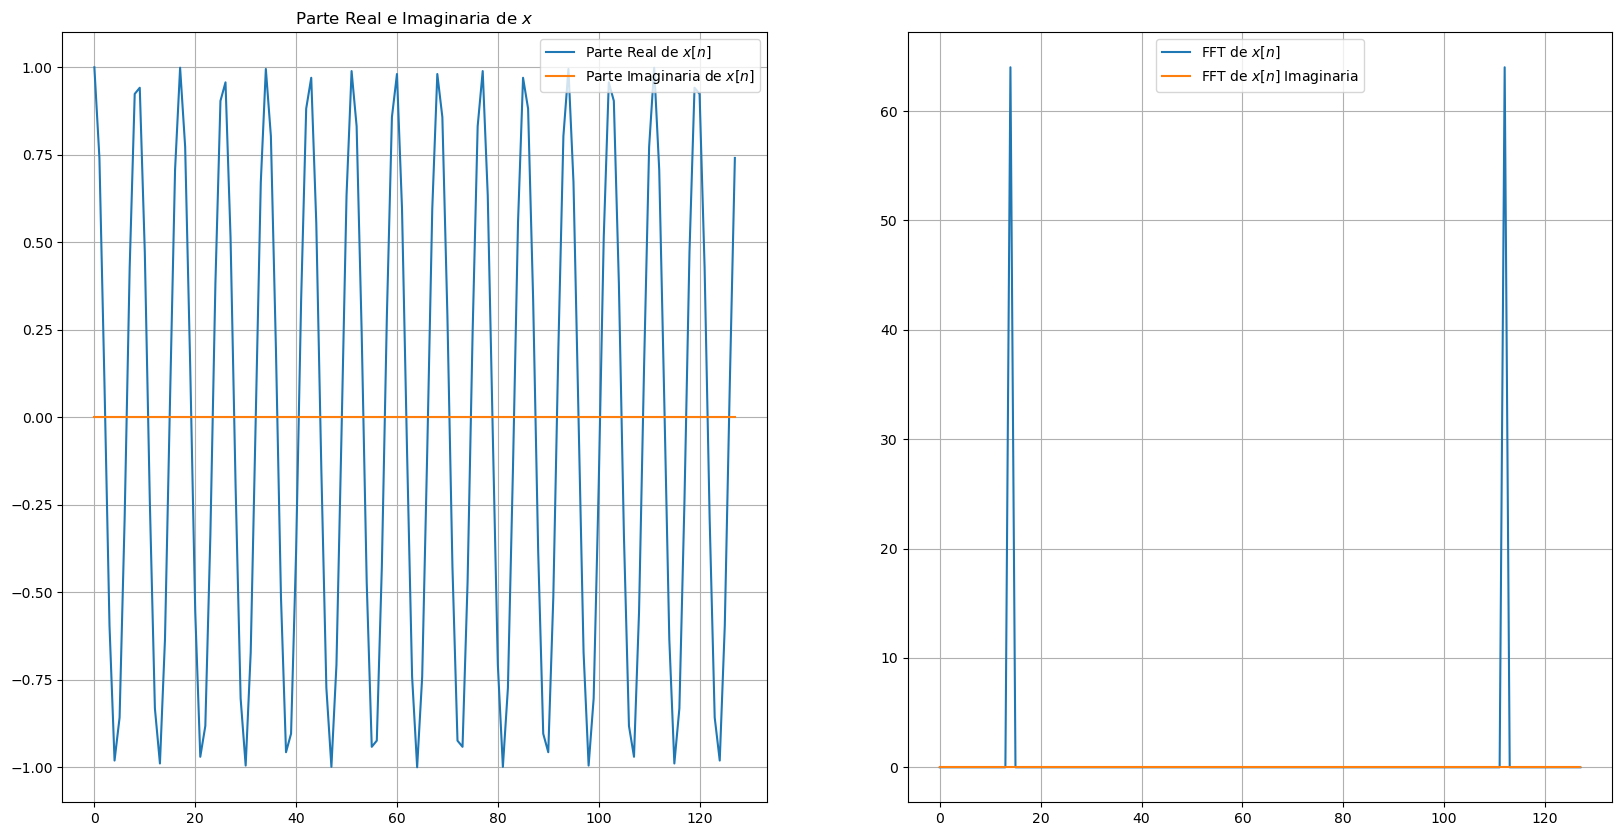

In [255]:
x = np.array([np.cos((30*np.pi*n)/N) for n in range(N)])


rx = 1/2*(x + np.conjugate(x))
ix = 1/2*(x - np.conjugate(x))

X = fft(x)
XR = (np.flip(X) + 1j*(np.flip(X)))
XI = X.imag

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Parte Real e Imaginaria de $x$")
plt.plot(rx, label="Parte Real de $x[n]$")
plt.plot(ix, label="Parte Imaginaria de $x[n]$")
# plt.plot(X.conjugate())
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(XR, label="FFT de $x[n]$")
plt.plot(XI, label="FFT de $x[n]$ Imaginaria")
plt.grid()
plt.legend()
plt.show()


### Simetria x[n] real e impar

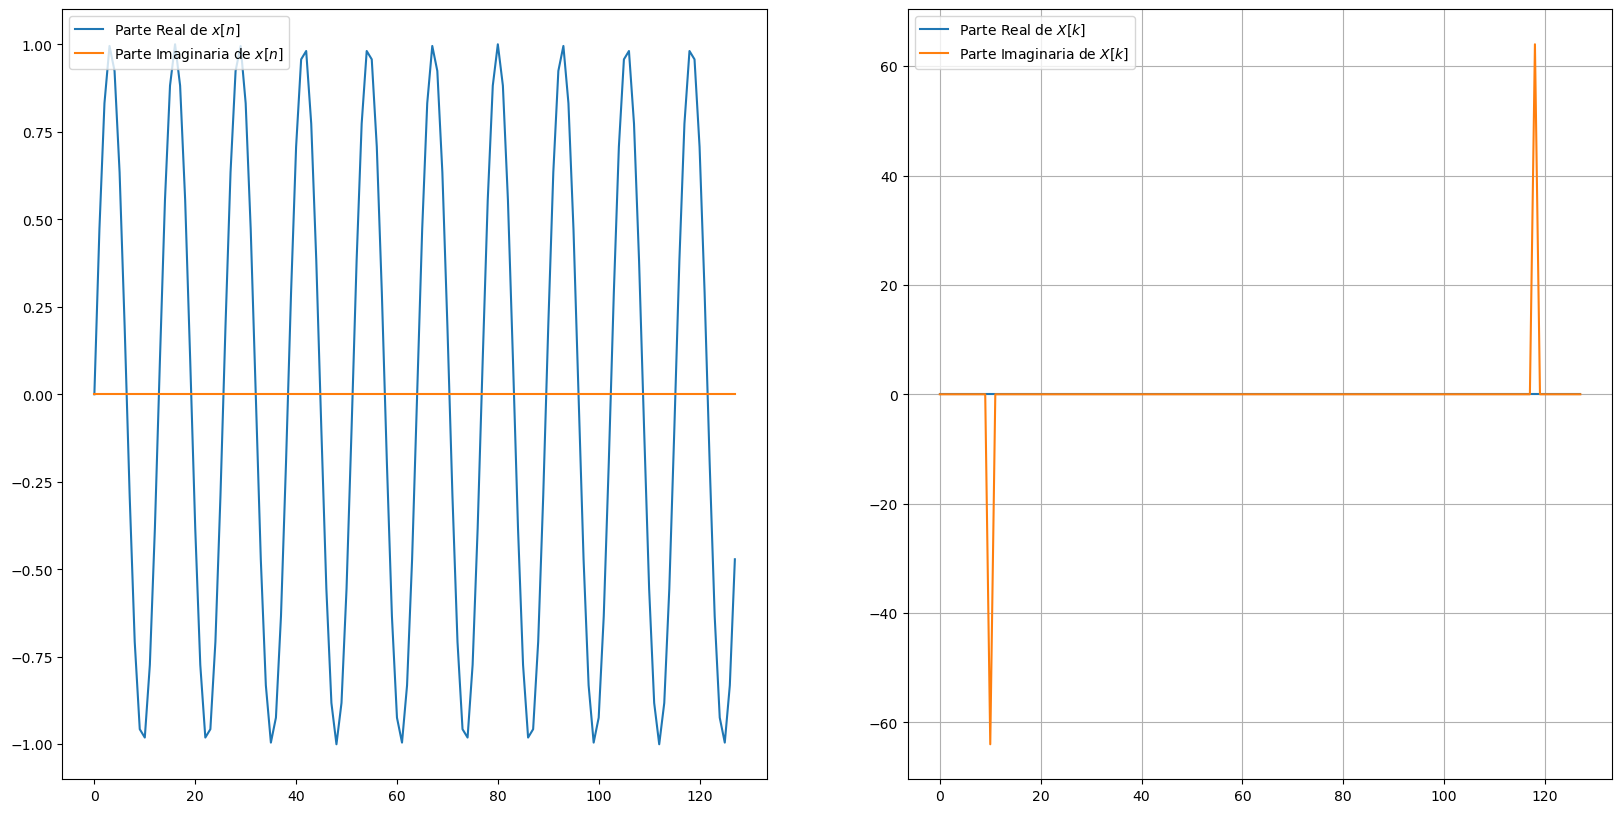

In [256]:
x = np.array([np.sin((20*np.pi*n)/N) for n in range(N)])

rx = 1/2*(x + np.conjugate(x))
ix = 1/2*(x - np.conjugate(x))


plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(rx, label="Parte Real de $x[n]$")
plt.plot(ix, label="Parte Imaginaria de $x[n]$")
plt.legend()


plt.subplot(1, 2, 2)
X = fft(x)
plt.plot(X.real, label="Parte Real de $X[k]$")
plt.plot(X.imag, label="Parte Imaginaria de $X[k]$")
plt.grid()
plt.legend()
